In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ALLCools.plot import *

In [2]:
prediction_result = pd.read_msgpack('total_prediction_summary.msg').iloc[:, :10]
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)
prediction_result = pd.concat([cell_tidy_data.loc[prediction_result.index], prediction_result], axis=1)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
prediction_result.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'CellClass', 'l1-umap_0', 'l1-umap_1', 'l1-tsne_0', 'l1-tsne_1',
       'MajorType', 'l2-umap_0', 'l2-umap_1', 'l2-tsne_0', 'l2-tsne_1',
       'SubType', 'l3-umap_0', 'l3-umap_1', 'l3-tsne_0', 'l3-tsne_1',
       'L1CellClass', 'class_tsne_0', 'class_tsne_1', 'class_umap_0',
       'class_umap_1', 'Order', 'RegionName', 'MajorRegion', 'SubRegion',
       'DetailRegion', 'PotentialOverlap (MMB)', 'Anterior (CCF coords)',
       'Posterior (CCF coords)', 'MajorRegionColor', 'SubRegionColor',
       'DissectionRegionColor', 'Replicate', 'region', 'type', 'soft_sum',
       'soft1', 'soft2', 'region_pred', 'region_true', 'type_pred',
       'type_true', 'prob_max'],
      dtype='object')

## Prediction Porbablity

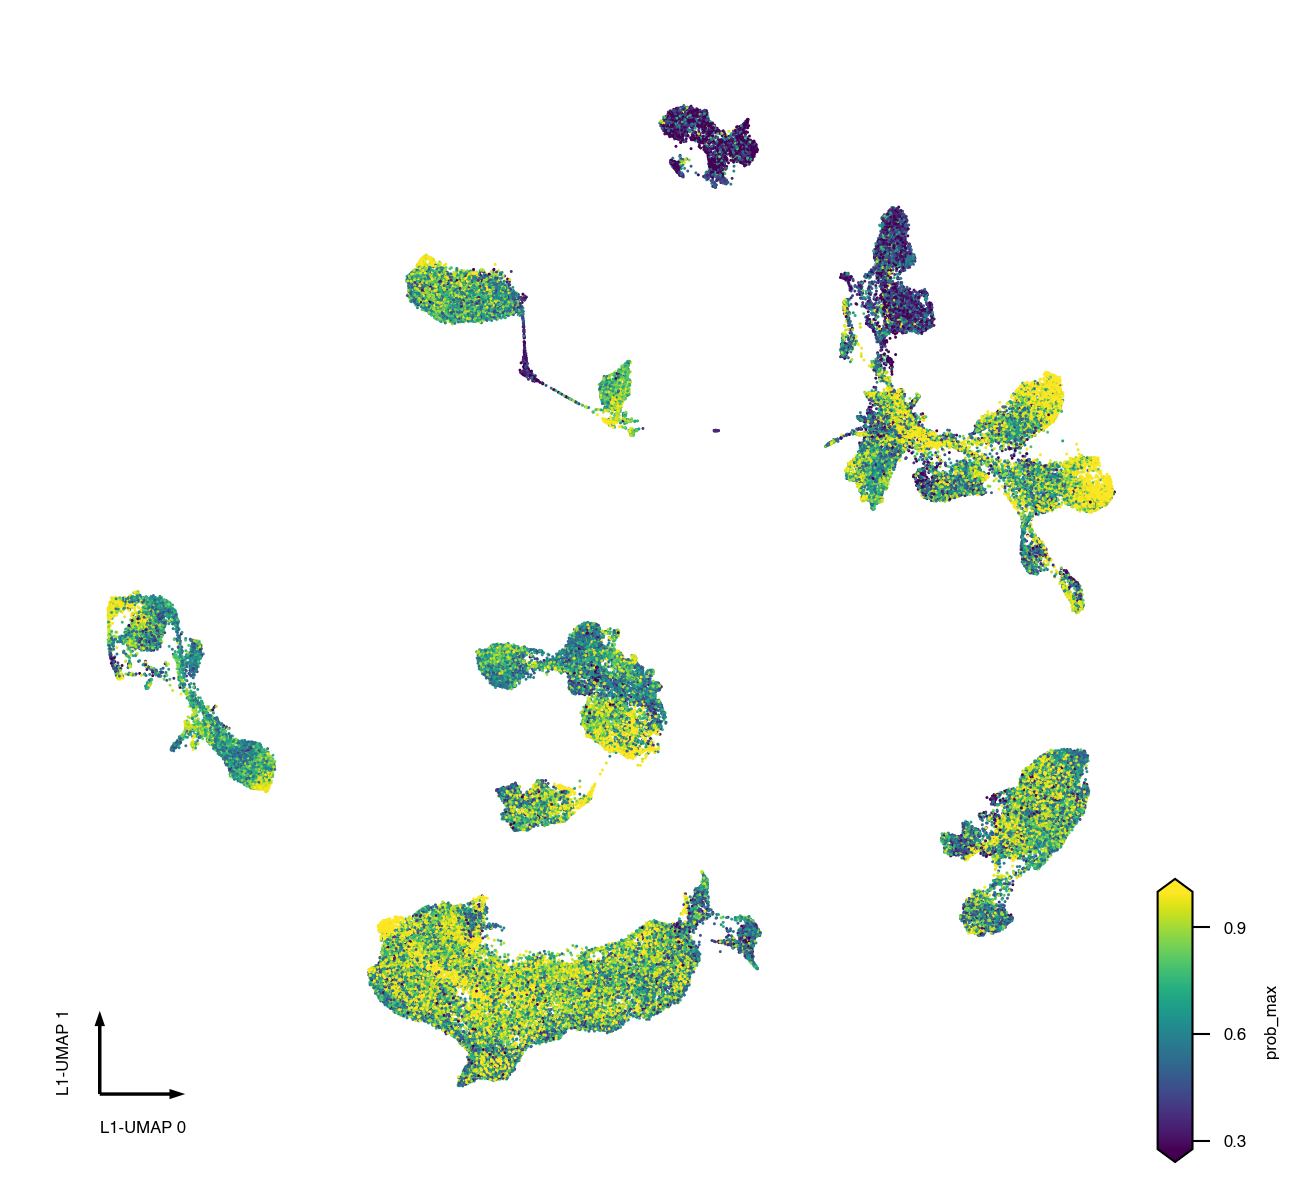

In [33]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
continuous_scatter(ax=ax, data=prediction_result, coord_base='l1-umap', 
                   hue='prob_max', max_points=None, s=0.5)
pass

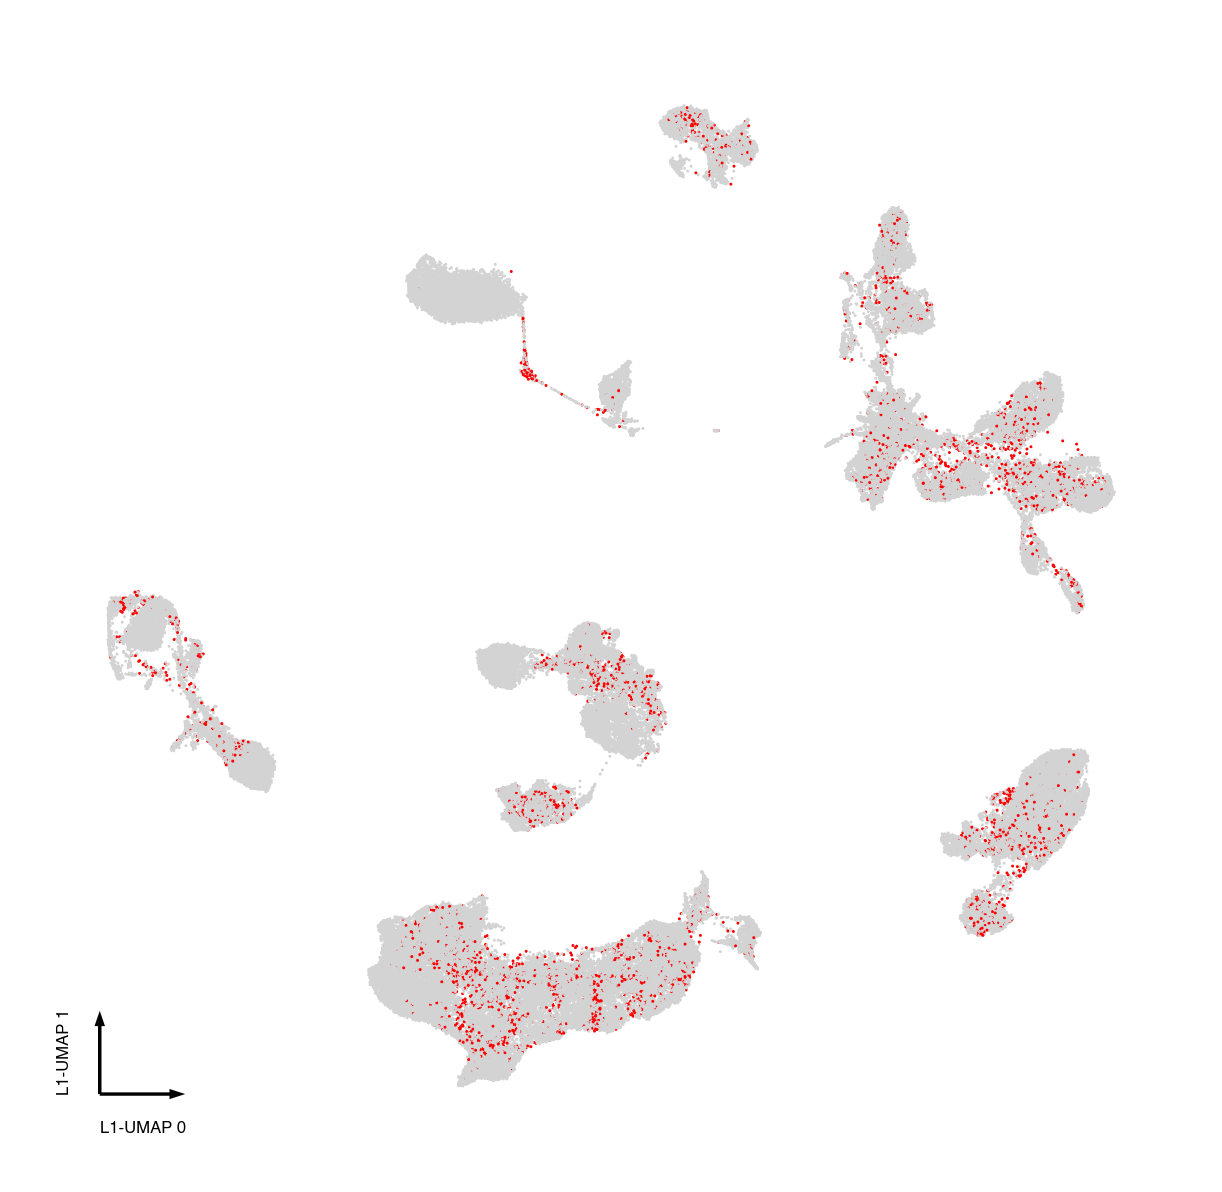

In [35]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
categorical_scatter(ax=ax,
                    data=prediction_result,
                    coord_base='l1-umap',
                    hue='type',
                    max_points=None,
                    s=0.5,
                    palette={
                        True: 'lightgray',
                        False: 'red'
                    })
pass

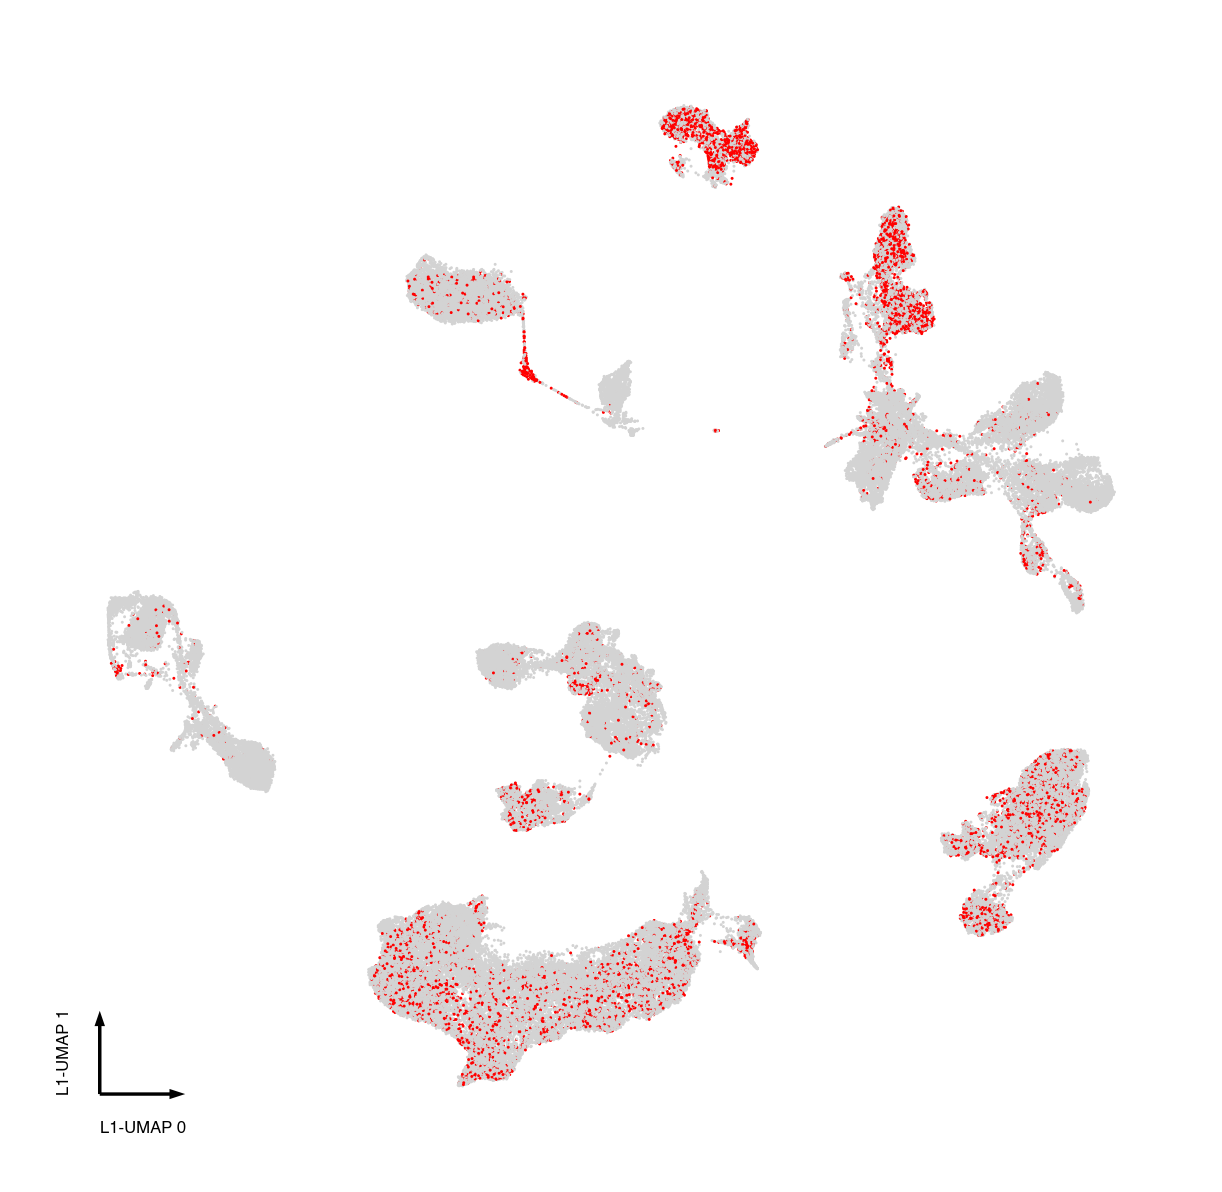

In [37]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
categorical_scatter(ax=ax,
                    data=prediction_result,
                    coord_base='l1-umap',
                    hue='soft1',
                    max_points=None,
                    s=0.5,
                    palette={
                        True: 'lightgray',
                        False: 'red'
                    })
pass

In [40]:
prediction_result['type'].sum() / prediction_result.shape[0]

0.9486877933526164

In [46]:
prediction_result['soft1'].sum() / prediction_result.shape[0]

0.8872784293781719

In [100]:
major_type_order = [
    'Gfra1', 'IG-CA2', 'DG-po', 'CA3', 'CA3-St18',
    'CA1', 'IT-L23', 'IT-L4', 'IT-L5', 'IT-L6', 'PT-L5', 'CT-L6', 'NP-L6', 'L6b',
    'EP', 'CLA', 'OLF-Exc', 'MGE-Pvalb', 'MGE-Sst', 'CGE-Vip', 'CGE-Lamp5', 'Unc5c', 'Chd7',
    'LSX-Inh', 'PAL-Inh', 'Foxp2', 'MSN-D1', 'MSN-D2', 'D1L-Fstl4', 'D1L-PAL',
    'DG', 'ANP', 'OLF'
]
sub_region_order = [
    'CP', 'ACB', 'LSX', 'PAL', 'MOB', 'AON', 'PIR', 'ORB', 'PFC', 'ACA', 'AI', 'MOp', 'MOs', 'SSp', 'SSs',
     'CA1-3', 'DG',
]

In [101]:
predict_col = 'soft1'

accuracy_data = prediction_result.groupby(['MajorType', 'SubRegion'])[predict_col].apply(lambda i: i.sum() / i.size)
size_data = prediction_result.groupby(['MajorType', 'SubRegion'])[predict_col].apply(lambda i: i.size)
size_data = np.log10(1 + size_data)
dot_data = pd.DataFrame({'Color': accuracy_data, 'Size': size_data}).reset_index()

In [102]:
dot_data['x'] = dot_data['SubRegion'].apply(lambda i: sub_region_order.index(i))
dot_data['y'] = dot_data['MajorType'].apply(lambda i: major_type_order.index(i))
dot_data.head()

,MajorType,SubRegion,Color,Size,x,y
0,ANP,ACB,0.000000,1.431364,1,31
1,ANP,AON,0.750000,1.230449,5,31
2,ANP,CP,0.054054,1.579784,0,31
3,ANP,DG,0.364407,2.075547,16,31
4,ANP,LSX,0.038462,1.431364,2,31


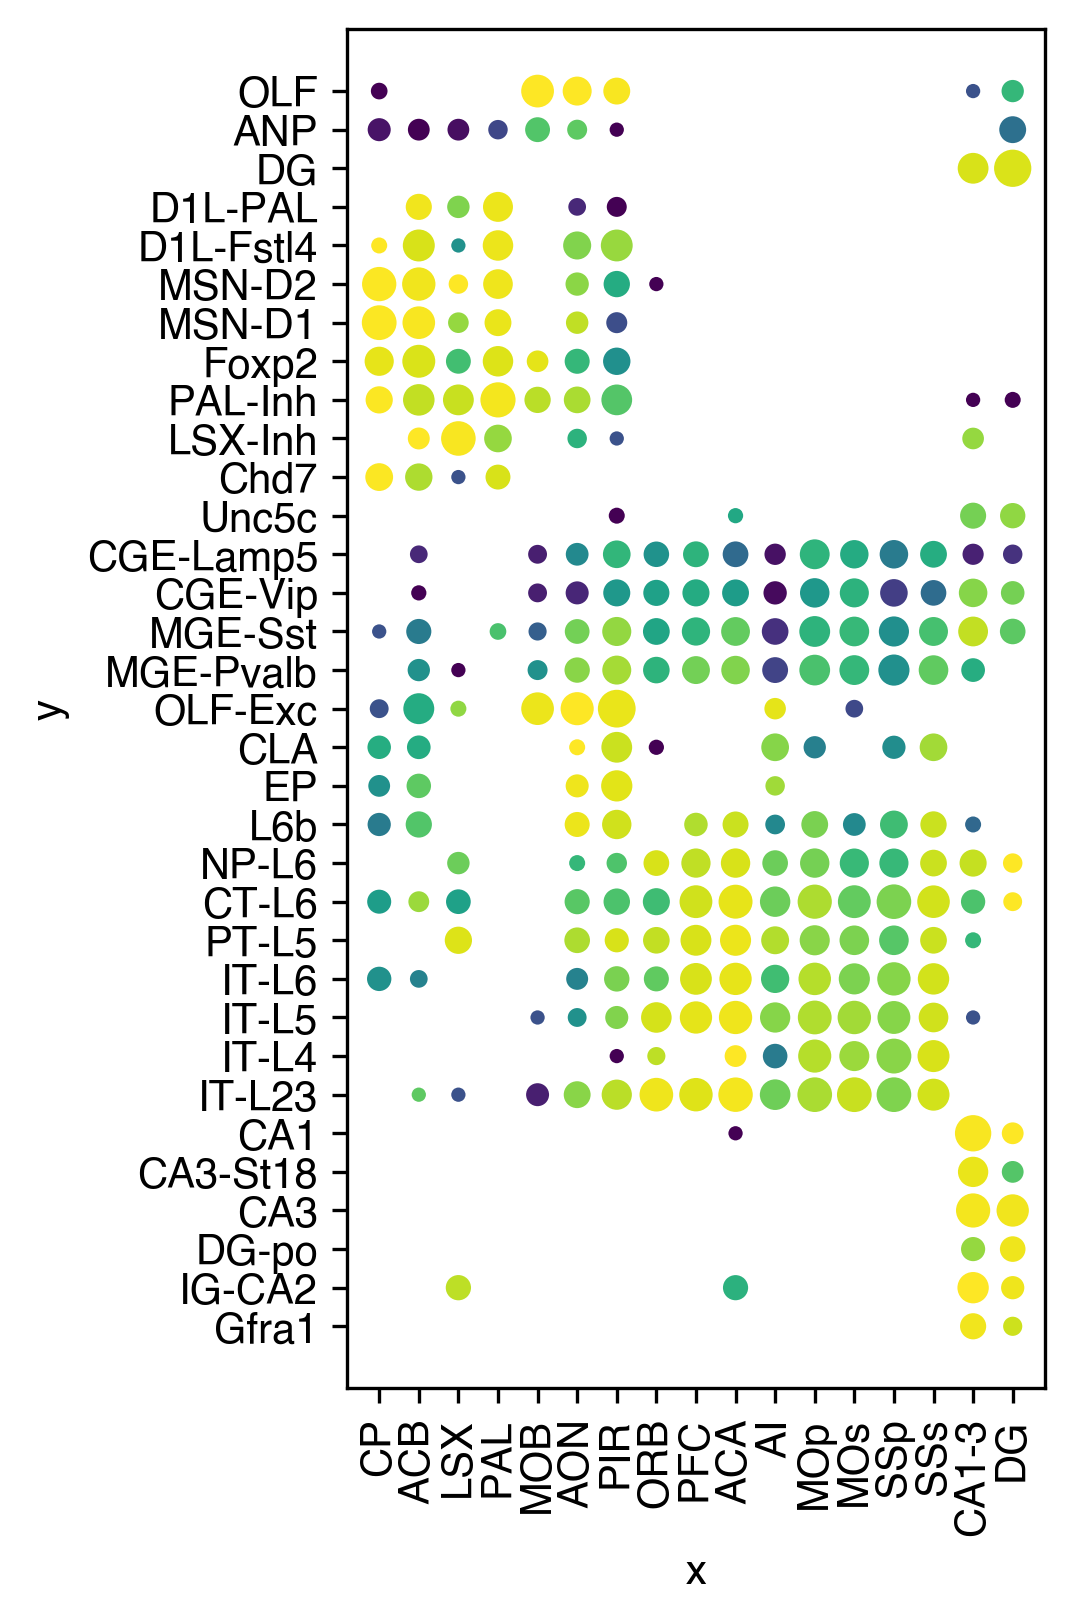

In [103]:
fig, ax = plt.subplots(figsize=(3, 6), dpi=300)

sns.scatterplot(ax=ax, data=dot_data, x='x', y='y',
                hue='Color', hue_norm=(0, 1), palette='viridis',
                size='Size', size_norm=(0, 4), sizes=(0, 100))
ax.set(xticks=range(len(sub_region_order)), xticklabels=sub_region_order,
       yticks=range(len(major_type_order)), yticklabels=major_type_order)
ax.xaxis.set_tick_params(rotation=90)
ax.legend_.set_visible(False)

In [108]:
prediction_result.loc['4A_M_827', 'SubRegion']

'ACA'